### 2) Pick your choice of document and update the emotion document accordingly (you document words and associated emotion where applicable) and analyse the sentiments of people.

In [1]:
#Import required libraries
import nltk
import string
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#open the text file
txt = open('father.txt', encoding="utf-8").read()
print(txt)

Introduction:

My father is a person who takes care of my family and loves each one of us dearly. My father acts as the pillar of support and strength for my family.

My Father:

My father is the person that I admire the most in my life. I can never forget all the childhood memories that I have with him. It is safe for me to say that my father is largely the reason behind my present joy and happiness. I can say that I am the person who I am today and the person that I am growing to be, is all because of the influence he has had and is having on me. He always makes time to play with me and catch up on all the happenings in my life even after the hard work of the day.

My father is one man who is very unique and different. I always feel lucky anytime I remember that he is my father knowing how he has done the very best for me in life. I always feel grateful that I have the opportunity to be his son and be a part of a wonderful family that has a great father like him. My father has shown 

In [3]:
# converting data to lowercase, removing its punctuations and splitting text into words
lower_case = txt.lower()
cleaned_txt = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = word_tokenize(cleaned_txt)

In [4]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [5]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [6]:
#Lets open the emotion document and find emotion present in our text
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' happy', ' happy', ' happy', ' codependent', ' safe', ' sad', ' happy', ' happy'] 
 

Count of each emotion 
 Counter({' happy': 5, ' codependent': 1, ' safe': 1, ' sad': 1})


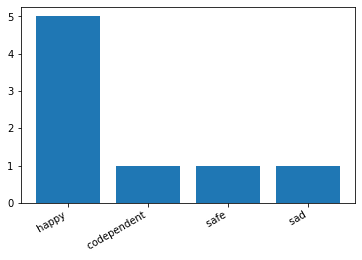

In [7]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()